## ** Análise Imóveis da União ** ## 

Serão analisados dois datasets (imoveis.csv e responsaveis.csv), os quais contêm, separadamente, dados sobre os imóveis em si e sobre os ocupantes de imóveis da União. De acordo com a União, esta separação visa a resguardar informações pessoais, nos termos do art. 55 do Decreto nº 7.724, de 2012, que regulamenta a Lei de Acesso à Informação.

A análise será realizada através da linguagem Python e as suas respectivas bibliotecas.

In [434]:
#importando bibliotecas para 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

#### ** 1. Preparação Dataset imoveis.csv ** ####
Importando os dados rerente aos imóveis da União para o Jupyter e padronizando-os para que se possa trabalhar com eles.

In [455]:
df = pd.read_csv('imoveis.csv.')
df.head()

,Classe,Número do RIP,UF,Município,Endereço,Bairro,Conceituação,Tipo Imóvel,Situação da Utilização,Proprietário Oficial,Regime de Utilização
0,DOMINIAL,401010051396,PA,ABAETETUBA,RIO GUAJARA DE BEJA S/N CEP: 68440000,ZONA RURAL,MARGINAL DE RIO,TERRENO,EM USO,União (Adm. Pub. Fed. direta),TAU ...
1,DOMINIAL,401010013460,PA,ABAETETUBA,RIO ABAETE S/N COMUNIDADE NOSSA SENHORA DO BOM...,ZONA RURAL,MARGINAL DE RIO,TERRENO,EM USO,União (Adm. Pub. Fed. direta),TAU ...
2,DOMINIAL,401010044772,PA,ABAETETUBA,RIO FURO DOS CARECAS S/N COMUNIDADE SAO FRANCI...,ZONA RURAL,MARGINAL DE RIO,TERRENO,EM USO,União (Adm. Pub. Fed. direta),TAU ...
3,DOMINIAL,401010055464,PA,ABAETETUBA,RIO GUAJARA DE BEJA S/N COMUNIDADE SAO FRANCIS...,ZONA RURAL,MARGINAL DE RIO,TERRENO,EM USO,União (Adm. Pub. Fed. direta),TAU ...
4,DOMINIAL,401010036400,PA,ABAETETUBA,RIO URUBUEUA CABECEIRA S/N COMUNIDADE NOSSA SE...,ZONA RURAL,MARGINAL DE RIO,TERRENO,EM USO,União (Adm. Pub. Fed. direta),TAU ...


In [407]:
df.info() # informações gerais sobre o dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688305 entries, 0 to 688304
Data columns (total 11 columns):
classe                  688305 non-null object
rip                     688305 non-null object
uf                      688305 non-null object
municipio               688305 non-null object
endereco                688305 non-null object
bairro                  688305 non-null object
conceituacao            688305 non-null object
tipo_imovel             688305 non-null object
situacao_utilizacao     688305 non-null object
proprietario_oficial    688305 non-null object
regime_utilizacao       688305 non-null object
dtypes: object(11)
memory usage: 57.8+ MB


Nota-se que há acentuação no nome das colunas do dataframe, alteraremos os nomes para facilitar a manipulação da tabela.

In [408]:
df.columns = (['classe', 'rip', 'uf', 'municipio','endereco', 'bairro','conceituacao', 'tipo_imovel', 
               'situacao_utilizacao','proprietario_oficial', 'regime_utilizacao'])
df.columns

Index(['classe', 'rip', 'uf', 'municipio', 'endereco', 'bairro',
       'conceituacao', 'tipo_imovel', 'situacao_utilizacao',
       'proprietario_oficial', 'regime_utilizacao'],
      dtype='object')

Tiramos toda acentuação do dataset também e colocamos todas as palavras em minúscula

In [409]:
df = df.astype(str).apply(lambda x: x.str.lower()) # para colocar letras em minúsculas
df.head()

,classe,rip,uf,municipio,endereco,bairro,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,dominial,401010051396,pa,abaetetuba,rio guajara de beja s/n cep: 68440000,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
1,dominial,401010013460,pa,abaetetuba,rio abaete s/n comunidade nossa senhora do bom...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
2,dominial,401010044772,pa,abaetetuba,rio furo dos carecas s/n comunidade sao franci...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
3,dominial,401010055464,pa,abaetetuba,rio guajara de beja s/n comunidade sao francis...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
4,dominial,401010036400,pa,abaetetuba,rio urubueua cabeceira s/n comunidade nossa se...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...


In [411]:
def corrigir_nomes(nome): #função para eliminar sinais gráficos
    nome = nome.replace('á','a').replace('ã','a').replace('à','a').replace('â','a').replace('é','e').replace('è','e').replace('ê','e').replace('í','i').replace('ì','i').replace('ó','o').replace('ò','o').replace('ô','o').replace('õ','o').replace('ú','u').replace('ù','u').replace('û','u').replace('ü','u').replace('ç','c')
    return nome

#### ** 1.1 Variáveis ** #### 
Agora vamos compreender as variáveis que o conjunto de dados possue:

- CLASSE:  Tipos de imóveis existentes para a União;
- RIP: Registro Imobiliário Patrimonial) é a identificação do imóvel no cadastro da SPU (Secretaria do Patrimônio da União). É por intermédio dele que se faz o gerenciamento de lançamentos de débitos e de créditos, controle da cadeia de posse de titulares e de outros registros necessários à administração do imóve;
- UF: Estado;
- MUNICÍPIOS: Cidade;
- ENDEREÇO: Localidade do imóvel;
- BAIRRO: Localidade do imóvel;
- CONCEITUAÇÃO: Tipos de bens da União, conforme definido no art. 20 da Constituição Federal;
- TIPO IMÓVEL:O que é o imóvel;
- SITUAÇÃO UTILIZAÇÃO: Status do imóvel referente ao seu uso;
- PROPRIETÁRIO OFICIAL: Dono do imóvel, e;
- REGIME UTILIZAÇÃO: Classificação do tipo de utilização do imóvel.

In [412]:
df.classe.unique() #observando os registros em cada variável

array(['dominial', 'imovel funcional', 'uso especial'], dtype=object)

**Tipos de Classe:**

* DOMINIAL: iimóveis da União que não são ocupados pela Administração Pública, mas sim cedidos a terceiros por meio de instrumentos de regularização fundiária
* IMÓVEL FUNCIONAL: imóveis residenciais de propriedade da União cedidos para uso por agentes políticos e servidores públicos federais. 
* USO ESPECIAL: imóveis que se destinam à execução de serviços administrativos ou à prestação de serviços públicos em geral, tais como prédios de repartições públicas. 

In [249]:
df.uf.unique()

array(['pa', 'sc', 'ce', 'mt', 'go', 'pb', 'ma', 'ba', 'rr', 'pr', 'am',
       'ms', 'ap', 'pi', 'se', 'to', 'es', 'rj', 'rn', 'rs', 'ac', 'al',
       'pe', 'sp', 'mg', 'df', 'ro', 'ex'], dtype=object)

In [413]:
df['conceituacao'] = df['conceituacao'].apply(corrigir_nomes)
df.conceituacao.unique()

array(['marginal de rio               ', 'acrescido de marinha          ',
       'marinha                       ', 'marinha com acrescido         ',
       'nac.int c/marinha e acresc.mar', 'nacional interior             ',
       'marinha com nacional interior ', 'marginal de rio c/nac interior',
       'marginal de rio com acrescido ', 'acrescido de marginal de rio  ',
       'projecao s/plataf. continental', 'terra indigena                ',
       'nacional interior', 'marinha com nacional interior',
       'nao informado', 'marinha', 'marinha com acrescido de marinha',
       'acrescido de marinha', 'terra indigena'], dtype=object)

**Bens da União:**
* TERRENOS DE MARINHA E SEUS ACRESCIDOS: Terrenos localizados em uma faixa de 33 metros contatos a partir do mar em direção ao continente ou interior das ilhas costeiras. A  contagem inicia-se após a Linha do Pré Mar (LPM) estabelecida de acordo com a maré máxima do ano de 1831. Entre esses terrenos encontram-se: i. acrescido de marinha; ii. marinha; iii.marinha com acrescido; iv. nac.int c/marinha e acresc.mar, e; v. marinha com nacional interior.
* TERRENOS E ACRESCIDOS DE MARGINAL DE RIO: Terrenos marginais são aqueles banhados pelos rios, lagos ou quaisquer correntes de águas federais e fora do alcance das marés. Assim como os terrenos de marinha, os terrenos de marginal de rio compreendem uma faixa de 15 metros, medidos horizontalmente em direção à parte da terra, contados a partir da Linha Média das Enchentes Ordinárias (LMEO). Entre esses terrenos encontram-se:i.marginal de rio; ii. marginal de rio c/nac interior; iii.marginal de rio com acrescido,e; iv.acrescido de marginal de rio.
* TERRAS INDÍGENAS: Terrenos destinados aos povos originários. A demarcação das terras indígenas é competência da Fundação Nacional do Índio (Funai) e o processo administrativo de demarcação, após a elaboração de estudo antropológico, é submetido ao crivo do Ministério da Justiça e Cidadania
* NACIONAL INTERIOR: Terminologia utilizada para definir todos os imóveis que não são caracterizados como: Acrescido de Marginal de Rio, Acrescido de Marinha, Marginal de Rio, Marginal de Rio com Nacional Interior, Marginal de Rio com Acrescido, Marinha, Marinha com Acrescido, Marinha com Nacional Interior, Nacional Interior com Marinha e Acrescido de Marinha, Nacional Interior, Projeção sem Plataforma Continental, Terra Indígena.
* PROJEÇÃO SEM PLATAFORMA CONTINENTAL: Não há informações sobe essa caracterização. Porém, acredito que seja terreno que não compreende a plataforma continental, ou seja, poderia ser a zona costeira. Por sua vez a Plataforma Continental é a  porção dos fundos marinhos que começa na linha de costa e desce com um declive suave até o talude continental. Interessante notar que o pré-sal encontra-se na Plataforma Continental e, portanto é um bem da União, cabendo a sua exploração as diretrizes que essa aprover.

In [251]:
df.tipo_imovel = df.tipo_imovel.apply(corrigir_nomes)
df.tipo_imovel.unique()

array(['terreno', 'casa', 'fazenda', 'universidade',
       'autarquia / fundacao', 'escola', 'delegacia', 'apartamento',
       'residencia', 'edificio / predio', 'loja', 'galpao', 'gleba',
       'clube', 'quartel', 'embaixada', 'reserva', 'alfandega', 'parque',
       'outros', 'estacionamento', 'laboratorio', 'ilha (ilhota)',
       'hospital', 'aeroporto', 'sala', 'usina', 'farol (farolete)',
       'acude', 'armazem', 'observatorio', 'estacao', 'base', 'museu',
       'porto', 'aerodromo', 'faculdade', 'complexo', 'represa', 'teatro',
       "espelho d'agua", 'posto de fiscalizacao', 'conjunto', 'forte',
       'hotel', 'patio ferroviario', 'estadio', 'palacio', 'biblioteca',
       'cemiterio', 'subestacoes de transm. e distrib. energ. eletrica',
       'fabrica', 'estaleiro', 'presidio', 'via ferrea', 'convento',
       'pontes', 'consulado', 'passarelas e viadutos', 'oficinas'],
      dtype=object)

In [252]:
df.situacao_utilizacao = df.situacao_utilizacao.apply(corrigir_nomes)
df.situacao_utilizacao.unique()

array(['em uso', 'sem registro'], dtype=object)

In [253]:
df.proprietario_oficial = df.proprietario_oficial.apply(corrigir_nomes)
df.proprietario_oficial.unique()

array(['uniao (adm. pub. fed. direta)',
       'fundacao ou autarquia (adm. pub. fed. indireta)', 'outros',
       'empresa estatal dependente (adm. pub. fed. indireta)'],
      dtype=object)

In [254]:
df.regime_utilizacao = df.regime_utilizacao.apply(corrigir_nomes)
df.regime_utilizacao.unique()

array(['tau                                               ',
       'ocupacao                                          ', 'nan',
       'aforamento                                        ',
       'cdru                                              ',
       'cuem                                              ',
       'imovel funcional', 'uso em servico publico ',
       'entrega - administracao federal direta',
       'em regularizacao - reforma agraria', 'em regularizacao - outros',
       'locacao de terceiros', 'em regularizacao - entrega',
       'em regularizacao - cessao', 'usufruto indigena',
       'doacao sem encargo', 'vago para uso', 'disponivel para alienacao',
       'esbulhado (invadido)', 'entrega para aquicultura',
       'cessao para prefeituras, estados e outras entidades sem fins lucrativos',
       'cessao - outros', 'irregular - outros',
       'cessao - administracao federal indireta',
       'locacao para terceiros', 'em processo de alienacao',
       'irregular 

**Regime de Utilização** 

Os direitos de utilização dos bens imóveis da União, sejam construções, terras, águas ou florestas públicas podem ser destinados pela Secretaria do Patrimônio da União (SPU) a agentes públicos ou privados, visando efetivar a função socioambiental desse patrimônio, em harmonia com os programas estratégicos para a nação.

* AFORAMENTO: é um contrato por meio do qual a União atribui ao particular 83% do domínio de determinado imóvel, o denominado “domínio útil”, e mantém os 17% restantes, o “domínio direto”. Esse instrumento é utilizado nas situações em que coexistem a conveniência de destinar o imóvel e, ao mesmo tempo, manter o vínculo da propriedade. O instituto jurídico do aforamento é conhecido como enfiteuse.

* CESSÃO: autorização do uso de imóvel da União em condições definidas em contrato. Ela pode ser gratuita quando o imóvel  for utilizado nas situações em que houver o interesse em manter o domínio da União sobre o ele, mas haja interesse em destina-lo para utilização de entidade que exerça atividade de interesse público comprovada.Ou onerosa quando o imóvel se destina a atividade lucrativa ou a ações de apoio ao desenvolvimento local, como comércio, indústria e turismo. Há ainda a cessão em condições cspeciais, quando é possível a cobrança de determinados encargos e a cessão provisória a qual é um instrumento utilizado quando há inconsistência documental e urgência na cessão, em razão da necessidade de proteção ou de manutenção do imóvel.

* CDRU - CONCESSÃO DE DIREITO REAL DE USO: pode ser gratuita ou onerosa (paga), individual ou coletiva. Trata-se do Contrato Administrativo que transfere direitos reais da propriedade e pode ser transmissível por ato inter vivos e causa mortis.

* CUEM = CONCESSÃO DE USO ESPECIAL PARA FINS DE MORADIA: Outorgada àquele que, até 30 de junho de 2001, possuiu como seu, por cinco anos, ininterruptamente e sem oposição, até 250 m² de imóvel público situado em área urbana, utilizando-o para sua própria moradia ou de sua família.

* ENTREGA: Prevista no art. 79 do Decreto-Lei nº 9.760, de 1946, haverá entrega de imóvel da União para a  administração direta, para o uso no Serviço Público Federal.

* GUARDA PROVISÓRIA: Esse instrumento poderá ser aplicado em imóveis vagos ou parcialmente ocupados para sua proteção e manutenção. 

* OCUPAÇÃO: Ato administrativo precário que pressupõe o efetivo aproveitamento do terreno pelo ocupante. A inscrição de ocupação não gera direito real sobre o imóvel, sendo apenas para o reconhecimento de uma situação de fato, podendo, porém, gerar indenização nos casos em que houver benfeitorias construídas de boa-fé, mas sem autorização da Secretaria do Patrimônio da União (SPU).

A Inscrição de Ocupação é proibida:

    Em áreas de uso comum do povo;
    Em áreas de segurança nacional;
    Em áreas de preservação ambiental;
    Em áreas necessárias à preservação dos ecossistemas naturais, à implantação de programas ou ações de regularização fundiária de interesse social;
    Em áreas afetas a ações de demarcação de reservas indígenas;
    Em áreas remanescentes de quilombos,
    Em vias federais de comunicação;
    Em áreas reservadas para construção de hidrelétricas ou congêneres.


* TRANSFERÊNCIA (gratuita): permite viabilizar projetos de assentamento e reforma agrária. A transferência se assemelha a uma doação e é realizada para o Instituto Nacional de Colonização e Reforma Agrária (Incra). A manutenção da expressão “transferência do domínio pleno”, consagrada pelo uso, permite uma melhor identificação com o art. 10, §3º, da Lei nº 4.504, de 1964. Outros tipos de transferência são possíveis, mediante autorização legislativa específica.

fonte: http://www.planejamento.gov.br/assuntos/gestao/patrimonio-da-uniao/destinacao-de-imoveis/instrumentos-de-destinacao


In [ ]:
df.to_csv('imoveis_limpo', sep=';', encoding='utf-8') # exportando o dataset para um novo arquivo csv

#### ** 2. Analise Imóveis da União** ####

In [276]:
imoveis = pd.read_csv('imoveis_limpo',sep=';', encoding='utf-8') #importando o dataset 
imoveis.head(2)

,Unnamed: 0,classe,rip,uf,municipio,endereco,bairro,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,0,dominial,401010051396,pa,abaetetuba,rio guajara de beja s/n cep: 68440000,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
1,1,dominial,401010013460,pa,abaetetuba,rio abaete s/n comunidade nossa senhora do bom...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...


In [417]:
imoveis.info() #verificando se não há perdas de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688305 entries, 0 to 688304
Data columns (total 9 columns):
classe                  688305 non-null object
rip                     688305 non-null int64
uf                      688305 non-null object
municipio               688305 non-null object
conceituacao            688305 non-null object
tipo_imovel             688305 non-null object
situacao_utilizacao     688305 non-null object
proprietario_oficial    688305 non-null object
regime_utilizacao       671618 non-null category
dtypes: category(1), int64(1), object(7)
memory usage: 42.7+ MB


In [278]:
imoveis.drop(columns = ['Unnamed: 0', 'endereco','bairro'], inplace = True)
# apagando colunas que não serão utilizadas.

#### ** 2.1 Codificando Dataset ** #### 

In [279]:
imoveis.columns

Index(['classe', 'rip', 'uf', 'municipio', 'conceituacao', 'tipo_imovel',
       'situacao_utilizacao', 'proprietario_oficial', 'regime_utilizacao'],
      dtype='object')

Testando o cat code
Para isso precisa-se transformar a variável em categórica.

In [259]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688305 entries, 0 to 688304
Data columns (total 9 columns):
classe                  688305 non-null object
rip                     688305 non-null int64
uf                      688305 non-null object
municipio               688305 non-null object
conceituacao            688305 non-null object
tipo_imovel             688305 non-null object
situacao_utilizacao     688305 non-null object
proprietario_oficial    688305 non-null object
regime_utilizacao       671618 non-null object
dtypes: int64(1), object(8)
memory usage: 47.3+ MB


In [260]:
imoveis.proprietario_oficial = imoveis.proprietario_oficial.astype('category')
imoveis.dtypes

classe                    object
rip                        int64
uf                        object
municipio                 object
conceituacao              object
tipo_imovel               object
situacao_utilizacao       object
proprietario_oficial    category
regime_utilizacao         object
dtype: object

In [261]:
imoveis['proprietario_oficial_cat'] = imoveis['proprietario_oficial'].cat.codes
imoveis['proprietario_oficial'] = imoveis['proprietario_oficial_cat']
imoveis.drop(columns = ['proprietario_oficial_cat'], inplace = True)
imoveis.head()

,classe,rip,uf,municipio,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,dominial,401010051396,pa,abaetetuba,marginal de rio,terreno,em uso,3,tau ...
1,dominial,401010013460,pa,abaetetuba,marginal de rio,terreno,em uso,3,tau ...
2,dominial,401010044772,pa,abaetetuba,marginal de rio,terreno,em uso,3,tau ...
3,dominial,401010055464,pa,abaetetuba,marginal de rio,terreno,em uso,3,tau ...
4,dominial,401010036400,pa,abaetetuba,marginal de rio,terreno,em uso,3,tau ...


In [262]:
imoveis.proprietario_oficial = imoveis.proprietario_oficial.astype('category')

**                                         Proprietário Oficial:**

| **Proprietário**   | **Cód**   
|---------|:--------------:|
|empresa estatal dependente (adm. pub. fed. indireta)|0| 
|fundacao ou autarquia (adm. pub. fed. indireta |  1 |
| outros |  2 |
| uniao (adm. pub. fed. direta) |  3 | 

In [430]:
imoveis.regime_utilizacao.replace({'tau                                               ' :'1',
                                     'ocupacao                                          ' :'2',
                                'nan'                                                : '3',
                                'aforamento                                        ' : '4',
                                'cdru                                              ' : '5',
                                'cuem                                              ' : '6',
                                'imovel funcional'                       : '7',
                                'uso em servico publico '                : '8',
                                'entrega - administracao federal direta' : '9',
                                'em regularizacao - reforma agraria'     : '10',
                                'em regularizacao - outros'              : '11',
                                'locacao de terceiros'                   : '12',
                                'em regularizacao - entrega'             : '13',
                                'em regularizacao - cessao'              : '14',
                                'usufruto indigena'                      : '15',
                                'doacao sem encargo'                     : '16', 
                                'vago para uso'                          : '17',
                                'esbulhado (invadido)'                   : '18',
                                'entrega para aquicultura'               : '19',
                                'cessao para prefeituras, estados e outras entidades sem fins lucrativos' : '20',
                                'cessao - outros' : '21',
                                'irregular - outros' : '22',
                                'cessao - administracao federal indireta' :'23',
                                'locacao para terceiros' : '24',
                                 'em processo de alienacao' : '25',
                                'irregular - entrega' : '26',
                                'entrega para residencia obrigatoria' : '27',
                                'transferencia de imovel': '28',
                                'arrendamento' : '29',
                                'cessao onerosa' : '30',
                                'irregular - cessao' : '31',
                                'guarda provisoria' : '32',
                                'doacao com encargo' : '33',
                                'comodato' : '34',
                                'disponivel para alienacao' : '35'},inplace = True)

In [441]:
imoveis.regime_utilizacao = imoveis.regime_utilizacao.astype('category')
imoveis.classe = imoveis.classe.astype('category')
imoveis.rip = imoveis.rip.astype('category')
imoveis.uf = imoveis.uf.astype('category')
imoveis.municipio = imoveis.municipio.astype('category')
imoveis.conceituacao = imoveis.conceituacao.astype('category')
imoveis.proprietario_oficial = imoveis.proprietario_oficial.astype('category')
imoveis.tipo_imovel = imoveis.tipo_imovel.astype('category')
imoveis.situacao_utilizacao = imoveis.situacao_utilizacao.astype('category')
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688305 entries, 0 to 688304
Data columns (total 9 columns):
classe                  688305 non-null category
rip                     688305 non-null category
uf                      688305 non-null category
municipio               688305 non-null category
conceituacao            688305 non-null category
tipo_imovel             688305 non-null category
situacao_utilizacao     688305 non-null category
proprietario_oficial    688305 non-null category
regime_utilizacao       671618 non-null category
dtypes: category(9)
memory usage: 33.9 MB


In [446]:
imoveis.regime_utilizacao.unique() # noto que NaN não foi codificada, mas ela é considerada sem informação

[1, 2, NaN, 4, 5, ..., 30, 31, 32, 33, 34]
Length: 35
Categories (34, object): [1, 2, 4, 5, ..., 31, 32, 33, 34]

Como são muitas variáveis, achei melhor codificar manualmente do que utilizar o cat.code

**Regime de Utilização:**

| **Utilização**   | **Cód**   
|---------|:--------------:|
| tau |  1         |
|ocupacao | 2|
|s/informação |3|
|aforamento|4|
|cdru |5 |
|cuem |6|
|imovel funcional|7 |
|uso em servico publico |8 |
|entrega - administracao federal direta |9|
|em regularizacao - reforma agraria |10 |
|em regularizacao - outros |11 |
|locacao de terceiros |12 |
|regularizacao - entrega |13 |
|regularizacao - cessao | 14 |
|usufruto indigena| 15|
|doacao sem encargo | 16|
|vago para uso |17 |
|esbulhado (invadido) |18|
|entrega para aquicultura|19|
|cessao para prefeituras, estados e outras entidades sem fins lucrativos|20|
|cessao - outros|21|
|irregular - outros|22|
|cessao - administracao federal indireta|23|
|locacao para terceiros| 24|
|em processo de alienacao|25|
|irregular - entrega|26|
|entrega para residencia obrigatoria|27|
|transferencia de imovel|28|
|arrendamento| 29|
|cessao onerosa| 30|
|irregular - cessao|31|
|guarda provisoria| 32|
|doacao com encargo|33|
|comodato| 34|
|disponivel para alienacao| 35|

In [447]:
imoveis.conceituacao.replace({'marginal de rio               ' : 'marginal rio',
                              'acrescido de marinha          ' : 'terreno marinha',
                              'marinha                       ' : 'terreno marinha',
                              'marinha com acrescido         ' : 'terreno marinha',
                              'nac.int c/marinha e acresc.mar' : 'terreno marinha',
                              'nacional interior             ' : 'nacional interior',
                              'marinha com nacional interior ' : 'terreno marinha',
                              'marginal de rio c/nac interior' : 'marginal rio',
                              'marginal de rio com acrescido ' : 'marginal rio',
                              'acrescido de marginal de rio  ' : 'marginal rio',
                              'projecao s/plataf. continental' : 'projecao s/ plataf. continental',
                              'terra indigena                ' : 'terra indigena',
                              'nacional interior'              : 'nacional interior',
                              'marinha com nacional interior'  : 'terreno marinha',
                              'marinha'                        : 'terreno marinha',
                              'marinha com acrescido de marinha' : 'terreno marinha',
                              'acrescido de marinha'           : 'terreno marinha',
                              'margina rio'                    : 'marginal rio'}, inplace = True)

In [448]:
imoveis.conceituacao.unique()

array(['marginal rio', 'terreno marinha', 'nacional interior',
       'projecao s/ plataf. continental', 'terra indigena',
       'nao informado'], dtype=object)

#### ** 2.1 Overview Dados ** #### 

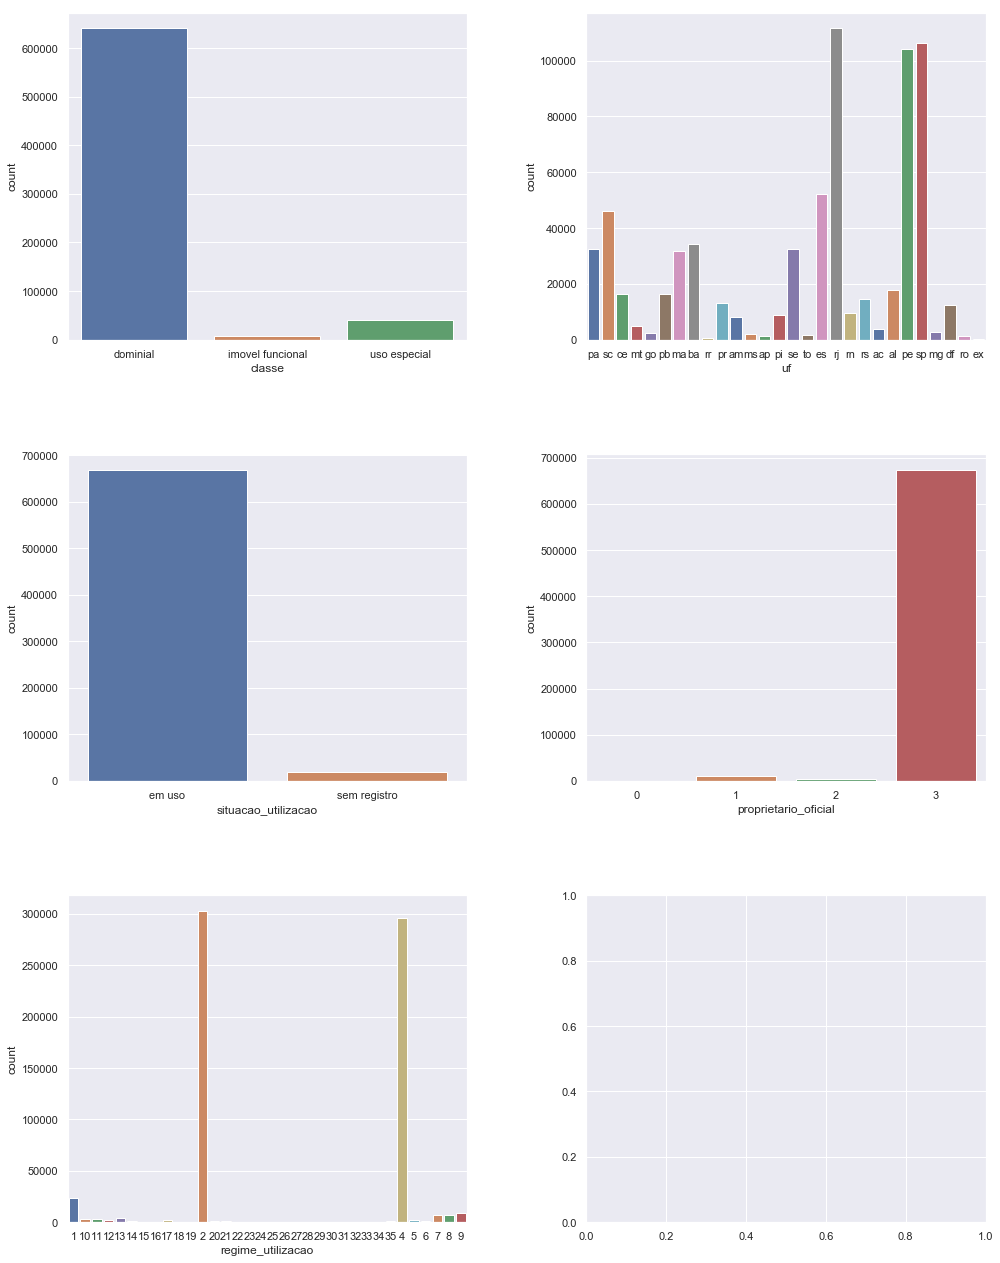

In [216]:
grafico1 = ['classe','classe', 'uf', 'situacao_utilizacao',
            'proprietario_oficial','regime_utilizacao']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
for col, ax in zip(grafico1[1:], axs.ravel()):
    sns.countplot(x=col, data=imoveis, ax=ax, palette="deep")
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)

A maior parte dos imóveis da união é da classe dominial (imóveis da União que não são ocupados pela Administração Pública, mas sim cedidos a terceiros por meio de instrumentos de regularização fundiária).

*Insight* Como podemos checar essas cessões? Elas geram algum ônus para a União? Assentamentos estão nesta categoria também?

Os estados que concentram a maior parte dos imóveis da União estão localizados em Pernambuco, Rio de Janeiro e São Paulo. Podemos encontrar a resposta para essa concentração pelo processo histórico do páis. 

Mais de 90% dos imóveis da União estão sendo utilizados, quem os utiliza? Qual o retorno disso para a população? 

O maior proprietário oficial dos imóveis da União são as instituições da adm. pub. fed. direta.

Os regimes de utilização com maior concentração são:
1. Ocupação (instrumentos de destinação de imóvel da União, é ato administrativo precário que pressupõe o efetivo aproveitamento do terreno pelo ocupante. A inscrição de ocupação não gera direito real sobre o imóvel, sendo apenas para o reconhecimento de uma situação de fato, podendo, porém, gerar indenização nos casos em que houver benfeitorias construídas de boa-fé, mas sem autorização da Secretaria do Patrimônio da União (SPU)), e; 

2. Aforamento (contrato por meio do qual a União atribui ao particular 83% do domínio de determinado imóvel, o denominado “domínio útil”, e mantém os 17% restantes, o “domínio direto”. Esse instrumento é utilizado nas situações em que coexistem a conveniência de destinar o imóvel e, ao mesmo tempo, manter o vínculo da propriedade. O instituto jurídico do aforamento é conhecido como enfiteuse.).

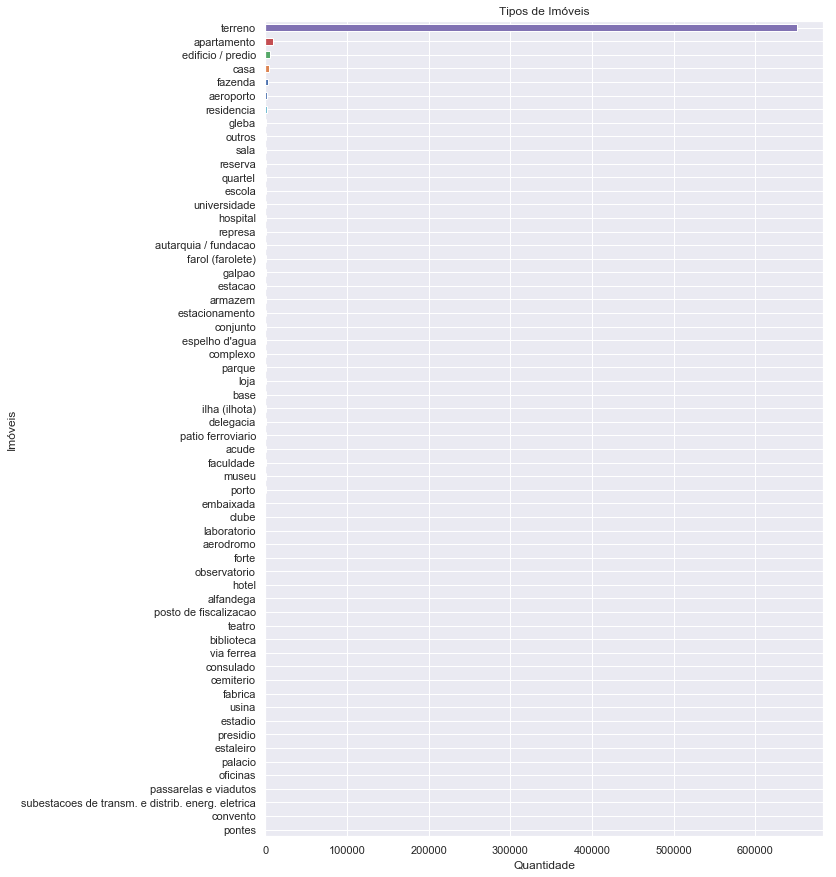

In [217]:
df.tipo_imovel.value_counts(ascending = True).plot(kind="barh", figsize=(10,15))
plt.title('Tipos de Imóveis')
plt.xlabel('Quantidade')
plt.ylabel('Imóveis')
plt.show()

A maior parte dos bens da União são os terrenos. Esses terrenos compreende a porções de terra no norte e/ou centro oeste do país? Já que lá é a área com menor densidade populacional e maior incidência de conflitos fundiários

In [218]:
df.tipo_imovel.value_counts()

terreno                                              650900
apartamento                                            9406
edificio / predio                                      5119
casa                                                   3923
fazenda                                                3598
aeroporto                                              2387
residencia                                             1943
gleba                                                  1205
outros                                                 1039
sala                                                    919
reserva                                                 829
quartel                                                 731
escola                                                  675
universidade                                            585
hospital                                                508
represa                                                 478
autarquia / fundacao                    

Nota-se que a maior parte dos imóveis da União são terrenos (650.900).

Questão: Onde estão localizados esses terrenos e qual a ocupação que eles têm ? 

|Raking Imóveis da União
|---------|:--------------:|
|apartamentos|9406|
| edificio / predio|5119|
|casa| 3923|
|fazenda| 3598|
|aeroporto|2387|
|residencia|1943|

Questão: Onde será que estão distribuidas esses imóveis?

Questão 2: A União só é proprietária de uma única ponte, porém, vimos essa semana por causa do problema com a ponte da que liga a Marginal Tietê com a Dutra que ela é responsável por essa (devido a Dutra ser uma rodovia federal). Como que fica isso? Há de fato algum gerenciamento sobre todos os bens da União?

#### ** 2.3 Overview por Região ** #### 

In [449]:
#criando uma coluna região na tabel
imoveis['regiao'] = 0
imoveis = imoveis[['classe', 'rip', 'uf','regiao','conceituacao','tipo_imovel','situacao_utilizacao',
             'proprietario_oficial','regime_utilizacao']]
imoveis.columns = ['classe', 'rip', 'uf','regiao','conceituacao','tipo_imovel','situacao_utilizacao',
             'proprietario_oficial','regime_utilizacao']
imoveis.head()

,classe,rip,uf,regiao,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,dominial,401010051396,pa,0,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
1,dominial,401010013460,pa,0,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
2,dominial,401010044772,pa,0,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
3,dominial,401010055464,pa,0,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
4,dominial,401010036400,pa,0,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1


In [450]:
#preenchendo a coluna região
regiao = {'ac' :"norte",  'ap' :"norte" , 'am' :"norte" , 'ro' :"norte" ,'rr' :"norte", 
          'pa' :"norte",'to':'norte','ma':'nordeste','ce':"nordeste",'al':"nordeste",'se':"nordeste",
          'pi':"nordeste",'rn':"nordeste",'pe':"nordeste",'pb':"nordeste",'ba':"nordeste",'rs':"sul",
          'sc':"sul",'pr':"sul",'es':'sudeste','rj':'sudeste','sp':'sudeste','mg':'sudeste',
          'mt':'centro_oeste', 'ms':"centro_oeste", 'df':'centro_oeste','go':'centro_oeste', 'ex':'exterior'}
imoveis['regiao']=imoveis['uf'].replace(regiao)
imoveis.head()

,classe,rip,uf,regiao,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,dominial,401010051396,pa,norte,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
1,dominial,401010013460,pa,norte,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
2,dominial,401010044772,pa,norte,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
3,dominial,401010055464,pa,norte,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1
4,dominial,401010036400,pa,norte,marginal rio,terreno,em uso,uniao (adm. pub. fed. direta),1


In [221]:
valores_regiao = imoveis.regiao.value_counts(sort = True)
print(valores_regiao)

sudeste         272934
nordeste        271352
sul              73530
norte            48900
centro_oeste     21465
exterior           124
Name: regiao, dtype: int64


A região Nordeste e Sudeste concentram os imóveis do país, como mencionado acima. 

Supreendentemente a região norte fica na quarta posição em relação a bens da União, como ficam a questão das terras?

*Insight:* Estudar questões ligadas a terras devolutas e os conflitos fundiários do Norte / Centro Oeste para entender o papel da União neles

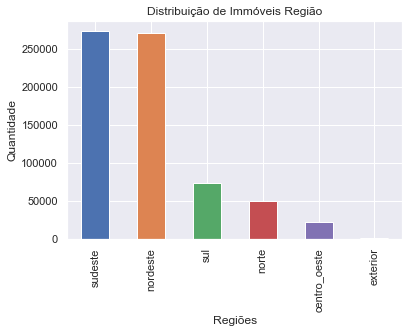

In [222]:
imoveis.regiao.value_counts(sort = True).plot(kind="bar")
plt.title('Distribuição de Immóveis Região')
plt.xlabel('Regiões')
plt.ylabel('Quantidade')
plt.show()

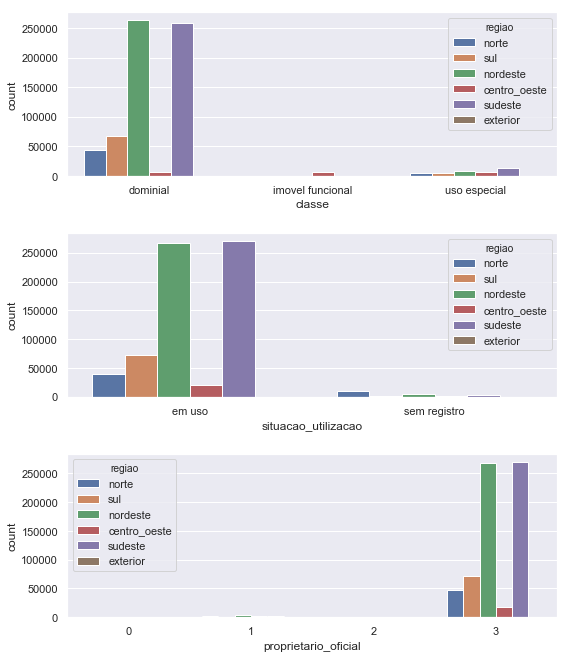

In [223]:
grafico2 = ['classe','classe', 'situacao_utilizacao',
            'proprietario_oficial']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
for col, ax in zip(grafico2[1:], axs.ravel()):
    x=imoveis.loc[:,col]
    sns.set()
    sns.countplot(x, hue=imoveis['regiao'], ax=ax, palette='deep')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

#### ** 2.4 Distribuição Tipo de Imóveis por Região ** #### 
Para entender como que os tipos de imóveis estão distribuidos pelo país. 

In [452]:
porregiao = imoveis[['regiao','tipo_imovel']] # criamos um dataset filtrado para analisar 

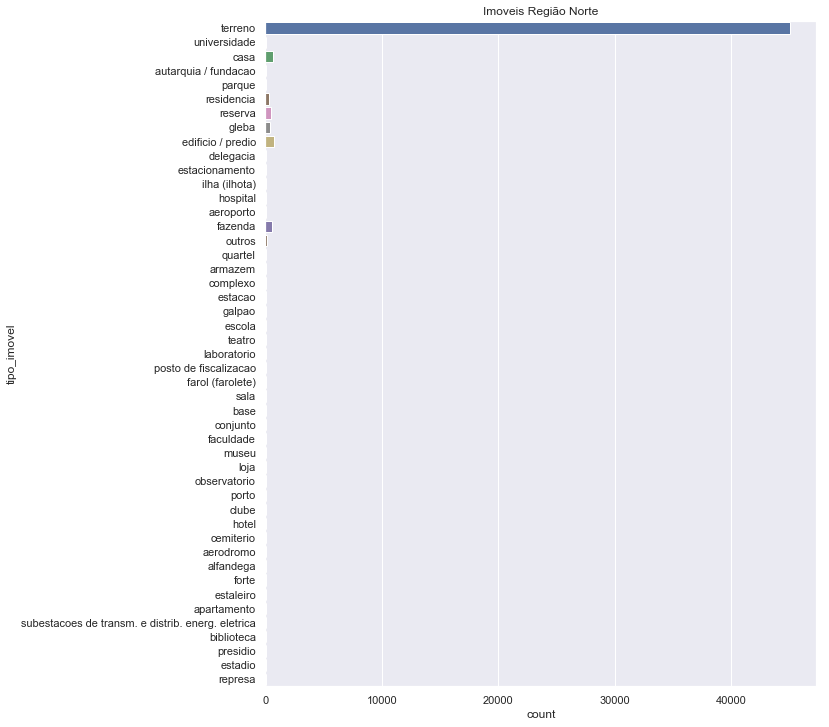

In [225]:
norte = porregiao[porregiao['regiao'] == 'norte']
fig, axs = plt.subplots(figsize=(9,11))
sns.set()
count_norte= sns.countplot(y="tipo_imovel", data=norte, palette ='deep')
plt.title('Imoveis Região Norte')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [226]:
norte.tipo_imovel.value_counts()

terreno                                              45080
edificio / predio                                      720
casa                                                   629
fazenda                                                526
reserva                                                440
gleba                                                  348
residencia                                             264
outros                                                 123
aeroporto                                               76
quartel                                                 71
universidade                                            68
farol (farolete)                                        66
autarquia / fundacao                                    49
escola                                                  46
complexo                                                46
hospital                                                44
parque                                                  

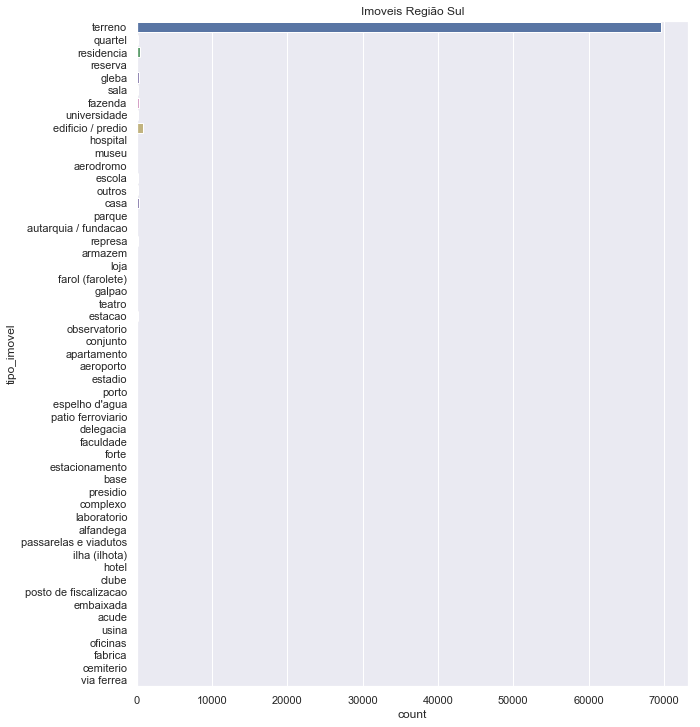

In [227]:
sul = porregiao[porregiao['regiao'] == 'sul']
fig, axs = plt.subplots(figsize=(9,11))
sns.set()
count_sul= sns.countplot(y="tipo_imovel", data=sul, palette ='deep')
plt.title('Imoveis Região Sul')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [228]:
sul.tipo_imovel.value_counts()

terreno                  69676
edificio / predio          879
residencia                 351
casa                       308
gleba                      256
fazenda                    247
quartel                    211
sala                       179
outros                     160
represa                    154
universidade               121
escola                     109
estacao                     87
conjunto                    77
reserva                     69
apartamento                 69
parque                      61
farol (farolete)            58
armazem                     57
aeroporto                   47
estacionamento              39
galpao                      37
hospital                    33
ilha (ilhota)               30
delegacia                   21
autarquia / fundacao        19
museu                       17
faculdade                   16
loja                        16
porto                       15
espelho d'agua              14
base                        13
observat

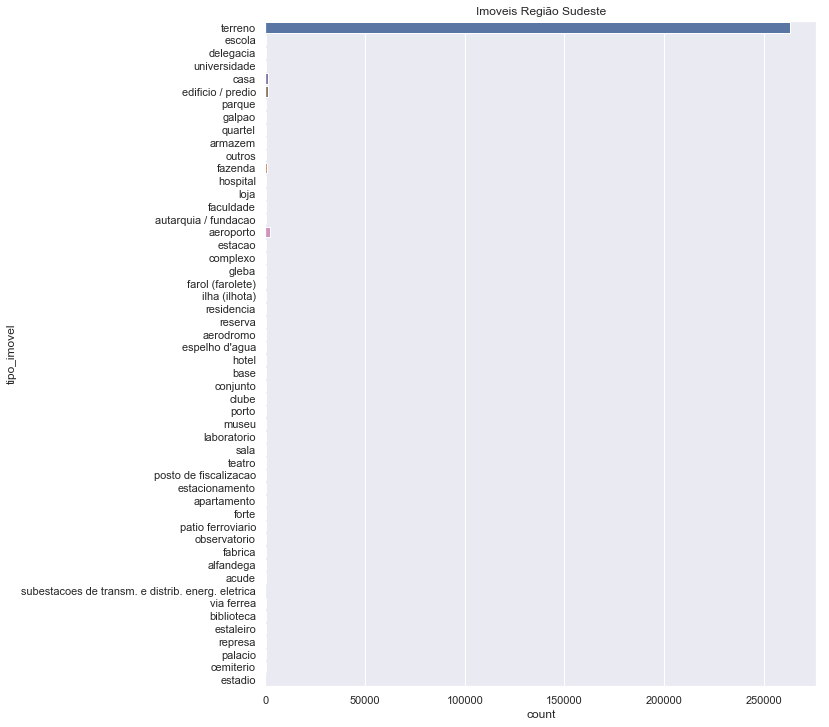

In [229]:
sudeste = porregiao[porregiao['regiao'] == 'sudeste']
fig, axs = plt.subplots(figsize=(9,11))
sns.set()
count_sudeste = sns.countplot(y="tipo_imovel", data=sudeste, palette ='deep')
plt.title('Imoveis Região Sudeste')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [230]:
sudeste.tipo_imovel.value_counts()

terreno                                              263219
aeroporto                                              2174
casa                                                   1468
edificio / predio                                      1387
fazenda                                                 633
outros                                                  467
sala                                                    393
apartamento                                             359
residencia                                              349
quartel                                                 244
autarquia / fundacao                                    227
escola                                                  183
universidade                                            157
represa                                                 142
galpao                                                  136
estacionamento                                          125
gleba                                   

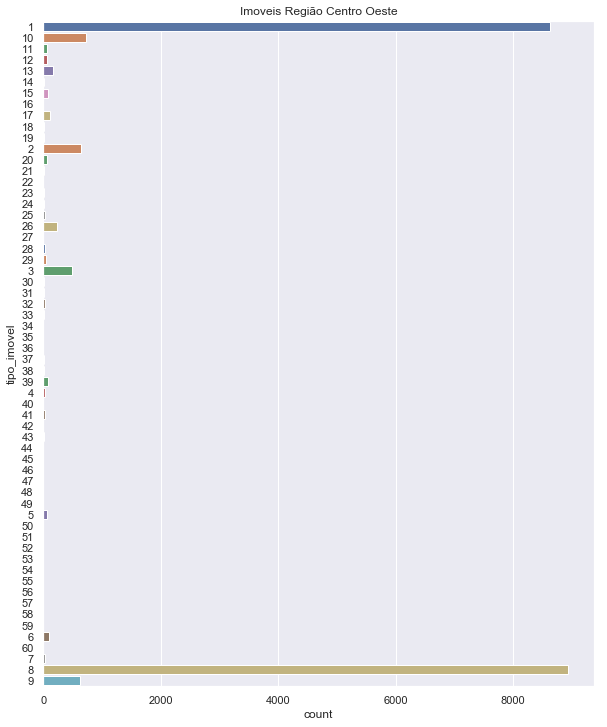

In [231]:
fig, axs = plt.subplots(figsize=(9,11))
sns.set()
count_centro_oeste = sns.countplot(y="tipo_imovel", data=centro_oeste, palette ='deep')
plt.title('Imoveis Região Centro Oeste')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [453]:
centro_oeste.tipo_imovel.value_counts()

8     8935
1     8639
10     735
2      639
9      619
3      483
26     230
13     166
17     123
6      100
39      88
15      75
11      72
5       70
20      63
12      61
29      47
28      31
7       31
4       29
41      24
25      23
32      22
14      19
24      16
38      13
30      12
19      11
31      10
37      10
43       9
33       9
21       7
23       7
18       6
40       4
45       4
48       4
34       3
35       2
47       2
49       2
16       2
54       2
22       1
36       1
27       1
50       1
53       1
57       1
58       0
60       0
42       0
44       0
46       0
51       0
52       0
55       0
56       0
59       0
Name: tipo_imovel, dtype: int64

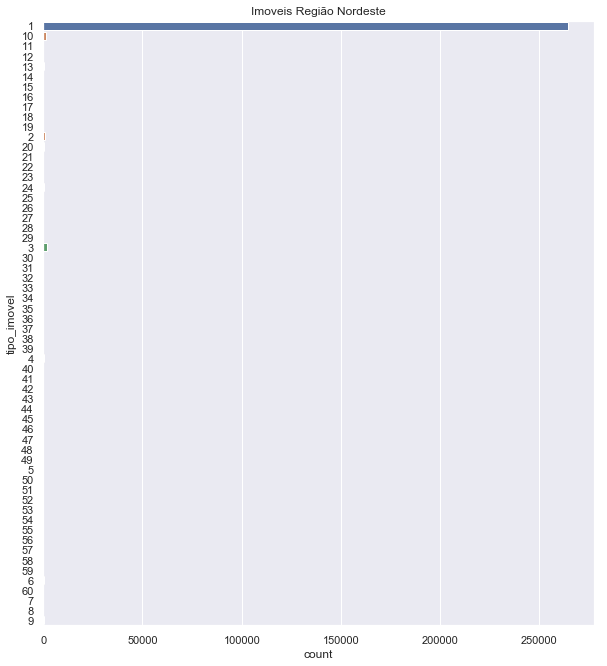

In [233]:
fig, axs = plt.subplots(figsize=(9,10))
sns.set()
count_nordeste = sns.countplot(y="tipo_imovel", data=nordeste, palette ='deep')
plt.title('Imoveis Região Nordeste')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [234]:
nordeste.tipo_imovel.value_counts()

1     264272
3       1709
10      1389
2        878
9        330
24       319
13       318
6        237
20       225
4        210
15       127
17       125
5        106
28       104
39        93
46        90
26        87
33        83
25        67
12        67
29        58
41        47
8         41
32        36
19        35
38        27
30        25
7         23
35        23
21        22
44        19
22        16
36        16
23        15
34        15
31        13
37        12
14        10
43        10
11         8
27         8
45         8
55         5
60         3
54         3
49         3
50         3
52         2
47         2
56         2
40         2
53         2
51         1
16         1
18         0
58         0
48         0
42         0
57         0
59         0
Name: tipo_imovel, dtype: int64

Nas regiões norte, sul, sudeste e nordeste o maior número de bens da União são os terrenos. No centro oeste, onde fica a capital federal, o maior número de bens é de apartamentos, o que faz sentido uma vez que você possui um grande número de funcionários públicos federais na capital.

**Dúvida: E os imóveis dominiais? Como estão distribuídos no território?**

Vale lembrar que os imóveis dominiais são imóveis da União que não são ocupados pela Administração Pública (direta ou indireta), mas sim cedidos a terceiros por meio de instrumentos de regularização fundiária.

In [96]:
imoveis.classe.unique()

array(['dominial', 'imovel funcional', 'uso especial'], dtype=object)

In [454]:
#criação de um dataset filtrado 
dominial = df[df['classe'] == 'dominial'] 
dominial.drop(columns = ['classe', 'bairro','endereco'], inplace =True)
dominial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641240 entries, 0 to 641239
Data columns (total 8 columns):
rip                     641240 non-null object
uf                      641240 non-null object
municipio               641240 non-null object
conceituacao            641240 non-null object
tipo_imovel             641240 non-null object
situacao_utilizacao     641240 non-null object
proprietario_oficial    641240 non-null object
regime_utilizacao       641240 non-null object
dtypes: object(8)
memory usage: 44.0+ MB


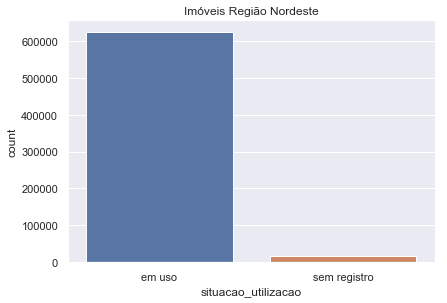

In [287]:
count_dominial = sns.countplot(x="situacao_utilizacao", data=dominial, palette ='deep')
plt.title('Imóveis Região Nordeste')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [129]:
dominial['situacao_utilizacao'].value_counts(ascending = True)

sem registro     16847
em uso          624393
Name: situacao_utilizacao, dtype: int64

In [286]:
dominial.head()

,rip,uf,municipio,endereco,bairro,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,401010051396,pa,abaetetuba,rio guajara de beja s/n cep: 68440000,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
1,401010013460,pa,abaetetuba,rio abaete s/n comunidade nossa senhora do bom...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
2,401010044772,pa,abaetetuba,rio furo dos carecas s/n comunidade sao franci...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
3,401010055464,pa,abaetetuba,rio guajara de beja s/n comunidade sao francis...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
4,401010036400,pa,abaetetuba,rio urubueua cabeceira s/n comunidade nossa se...,zona rural,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...


In [291]:
dominial_em_uso = dominial[dominial['situacao_utilizacao'] == 'em uso']
dominial_em_uso.head()

,rip,uf,municipio,conceituacao,tipo_imovel,situacao_utilizacao,proprietario_oficial,regime_utilizacao
0,401010051396,pa,abaetetuba,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
1,401010013460,pa,abaetetuba,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
2,401010044772,pa,abaetetuba,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
3,401010055464,pa,abaetetuba,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...
4,401010036400,pa,abaetetuba,marginal de rio,terreno,em uso,uniao (adm. pub. fed. direta),tau ...


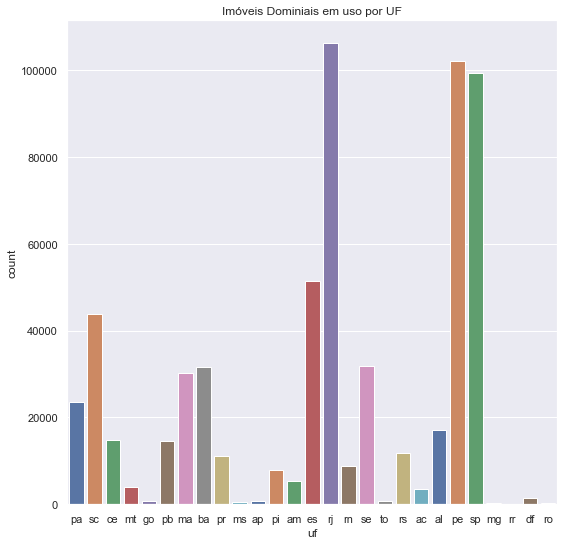

In [297]:
fig, axs = plt.subplots(figsize=(8,8))
sns.set()
count_dominial_em_uso = sns.countplot(x="uf", data=dominial_em_uso, palette ='deep')
plt.title('Imóveis Dominiais em uso por UF')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

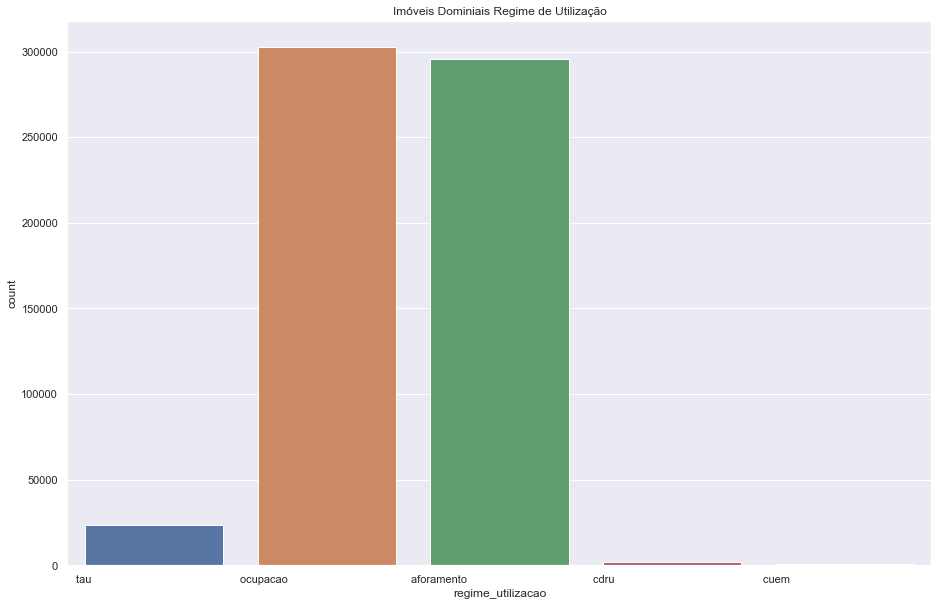

In [328]:
fig, axs = plt.subplots(figsize=(8,9))
sns.set()
count_dominial_em_uso = sns.countplot(x="regime_utilizacao", data=dominial_em_uso, palette ='deep')
plt.title('Imóveis Dominiais Regime de Utilização')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.5, right=2.0, hspace=0.35,
                    wspace=0.4)

In [309]:
dominial_em_uso.regime_utilizacao.value_counts()

ocupacao                                              302751
aforamento                                            295587
tau                                                    23287
cdru                                                    1778
cuem                                                     990
Name: regime_utilizacao, dtype: int64

In [304]:
dominial_em_uso.proprietario_oficial.value_counts()

uniao (adm. pub. fed. direta)    624393
Name: proprietario_oficial, dtype: int64

In [302]:
dominial_em_uso.tipo_imovel.value_counts()

terreno    624393
Name: tipo_imovel, dtype: int64

Porém o total de imóveis da classe dominicial em uso difere dos dados levantados no banco de dados de responsáveis. vamos verificar...

#### ** 4. Analise  Responsáveis por Imóveis da União** ####

In [330]:
responsaveis = pd.read_csv('responsaveis.csv')

In [333]:
responsaveis.columns

Index(['Classe', 'Tipo Responsável', 'CPF/CNPJ/CÓD. ENTIDADE', 'Ocupante',
       'REGIME UTILIZAÇÃO'],
      dtype='object')

In [332]:
responsaveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360443 entries, 0 to 360442
Data columns (total 5 columns):
Classe                    360443 non-null object
Tipo Responsável          360443 non-null object
CPF/CNPJ/CÓD. ENTIDADE    360443 non-null object
Ocupante                  360443 non-null object
REGIME UTILIZAÇÃO         360443 non-null object
dtypes: object(5)
memory usage: 13.7+ MB


In [339]:
responsaveis.columns = (['classe', 'tipo_responsavel', 'cpf', 'ocupante','regime_utilizacao'])
responsaveis.columns

Index(['classe', 'tipo_responsavel', 'cpf', 'ocupante', 'regime_utilizacao'], dtype='object')

In [340]:
responsaveis = responsaveis.astype(str).apply(lambda x: x.str.lower()) # para colocar letras em minúsculas
responsaveis.head()

,classe,tipo_responsavel,cpf,ocupante,regime_utilizacao
0,dominial,pessoa juridica,14.***.331/0001-31,10 n locacoes alphaville ltda ...,aforamento ...
1,dominial,pessoa juridica,32.***.667/0001-28,12 de setembro agropecuaria inco e empreendime...,ocupacao ...
2,dominial,pessoa juridica,07.***.912/0001-56,1 2 loka industria e comercio de confecoes ltd...,ocupacao ...
3,dominial,pessoa juridica,18.***.162/0001-06,13 de maio hotelaria eireli ...,ocupacao ...
4,dominial,pessoa juridica,61.***.488/0001-70,14 eventos ltda ...,aforamento ...


In [341]:
responsaveis['tipo_responsavel'] = responsaveis['tipo_responsavel'].apply(corrigir_nomes)
responsaveis['tipo_responsavel'].unique()

array(['pessoa juridica', '-', 'pessoa fisica', 'entidade da apf'],
      dtype=object)

In [342]:
responsaveis['ocupante'] = responsaveis['ocupante'].apply(corrigir_nomes)
responsaveis['ocupante'].unique()

array(['10 n locacoes alphaville ltda                          ',
       '12 de setembro agropecuaria inco e empreendimentos ltda',
       '1 2 loka industria e comercio de confecoes ltda        ', ...,
       'utfpr campus santa helena', 'utfpr - campus toledo',
       'vara da infancia e da juventude do d.f.'], dtype=object)

In [349]:
responsaveis['regime_utilizacao'] = responsaveis['regime_utilizacao'].apply(corrigir_nomes)
responsaveis['regime_utilizacao'].unique()

array(['aforamento                                        ',
       'ocupacao                                          ',
       'tau                                               ',
       'cuem                                              ',
       'cdru                                              ',
       'uso em servico publico ',
       'cessao - administracao federal indireta',
       'em regularizacao - cessao', 'locacao de terceiros',
       'em regularizacao - outros', 'disponivel para alienacao',
       'irregular - outros', 'imovel funcional', 'cessao - outros',
       'em regularizacao - entrega',
       'entrega - administracao federal direta', 'guarda provisoria',
       'irregular - entrega',
       'cessao para prefeituras, estados e outras entidades sem fins lucrativos',
       'vago para uso', 'comodato', 'em processo de alienacao',
       'locacao para terceiros', 'transferencia de imovel',
       'irregular - cessao', 'arrendamento', 'cessao onerosa',
       'usuf

* Overview

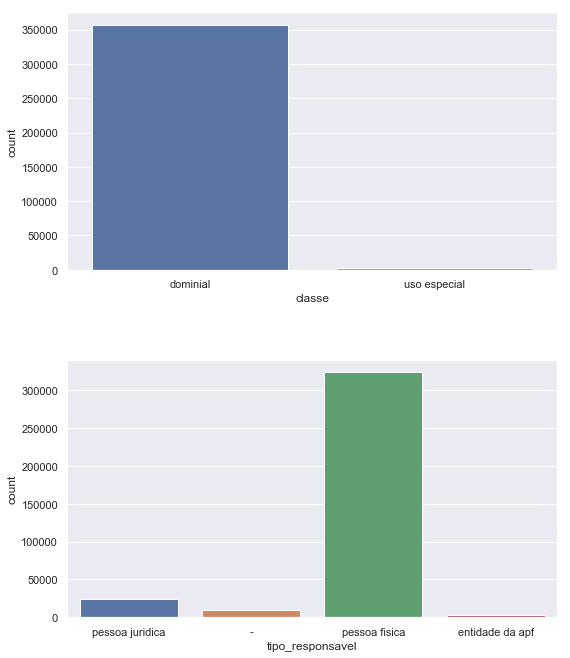

In [347]:
grafico4 = ['classe', 'classe', 'tipo_responsavel']
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
for col, ax in zip(grafico4[1:], axs.ravel()):
    x=responsaveis.loc[:,col]
    sns.set()
    sns.countplot(x, ax=ax, palette='deep')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

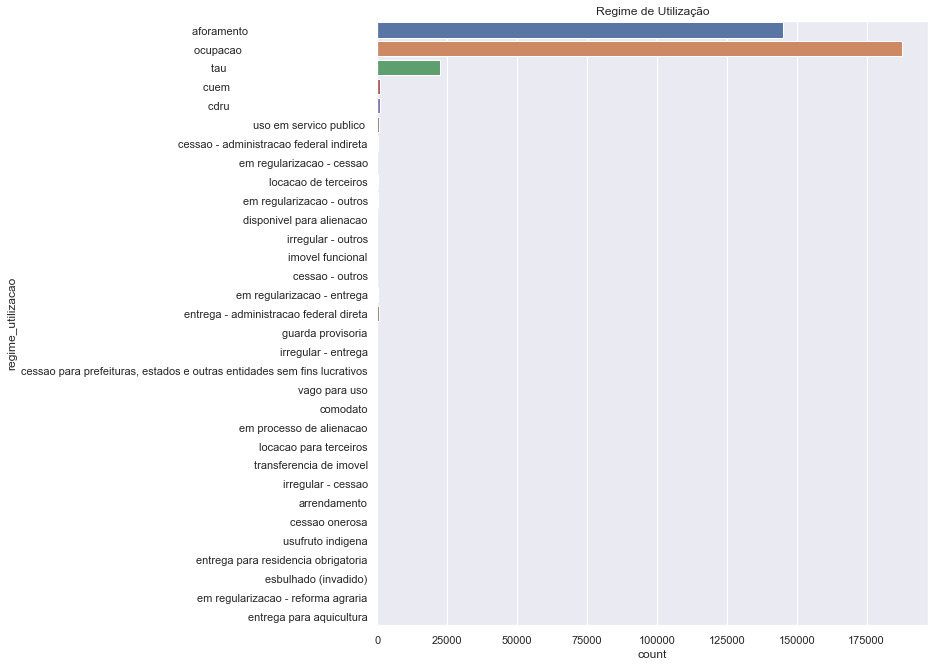

In [350]:
fig, axs = plt.subplots(figsize=(9,10))
sns.set()
count_responsaveis = sns.countplot(y="regime_utilizacao", data=responsaveis, palette ='deep')
plt.title('Regime de Utilização')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [351]:
responsaveis.regime_utilizacao.value_counts()

ocupacao                                                                   187598
aforamento                                                                 145108
tau                                                                         22568
cdru                                                                         1008
cuem                                                                          861
uso em servico publico                                                        748
entrega - administracao federal direta                                        700
locacao de terceiros                                                          432
em regularizacao - entrega                                                    259
em regularizacao - outros                                                     231
cessao - administracao federal indireta                                       180
cessao - outros                                                                89
em regularizacao

In [374]:
responsaveis_fisica = responsaveis[responsaveis['tipo_responsavel'] == 'pessoa fisica']
responsaveis_juridica = responsaveis[responsaveis['tipo_responsavel'] == 'pessoa juridica']
responsaveis_sinfo = responsaveis[responsaveis['tipo_responsavel'] == '-']
responsaveis_apf = responsaveis[responsaveis['tipo_responsavel'] == 'entidade da apf']

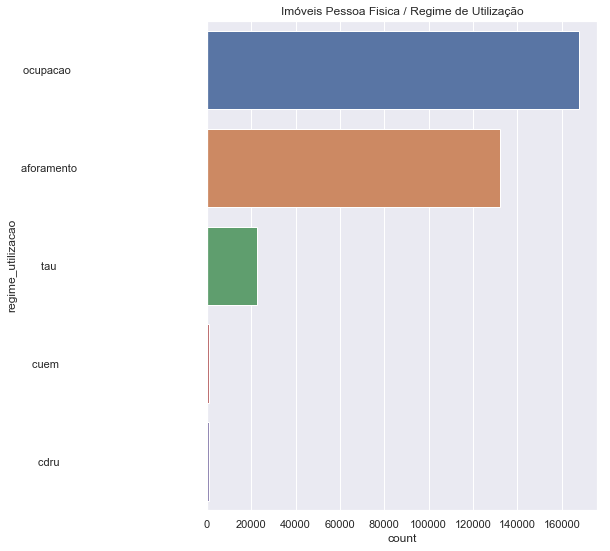

In [358]:
fig, axs = plt.subplots(figsize=(7,9))
sns.set()
count_responsaveis_fisica = sns.countplot(y="regime_utilizacao", data=responsaveis_fisica, palette ='deep')
plt.title('Imóveis Pessoa Fisica / Regime de Utilização');

In [398]:
fisica2 = responsaveis_fisica.regime_utilizacao.value_counts()
fisica = responsaveis_fisica.regime_utilizacao.count()
print(fisica2)
print('O Total é:', fisica)

ocupacao                                              167615
aforamento                                            132185
tau                                                    22558
cdru                                                     968
cuem                                                     859
Name: regime_utilizacao, dtype: int64
O Total é: 324185


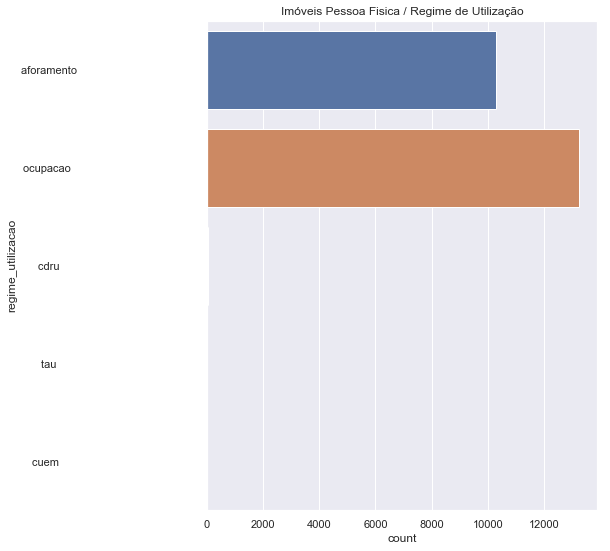

In [363]:
fig, axs = plt.subplots(figsize=(7,9))
sns.set()
count_responsaveis_juridica = sns.countplot(y="regime_utilizacao", data=responsaveis_juridica, palette='deep')
plt.title('Imóveis Pessoa Fisica / Regime de Utilização');

In [399]:
juridica2 = responsaveis_juridica.regime_utilizacao.value_counts()
juridica = responsaveis_juridica.regime_utilizacao.count()
print(juridica2)
print('Total é:', juridica)

ocupacao                                              13227
aforamento                                            10285
cdru                                                     40
tau                                                      10
cuem                                                      2
Name: regime_utilizacao, dtype: int64
Total é: 23564


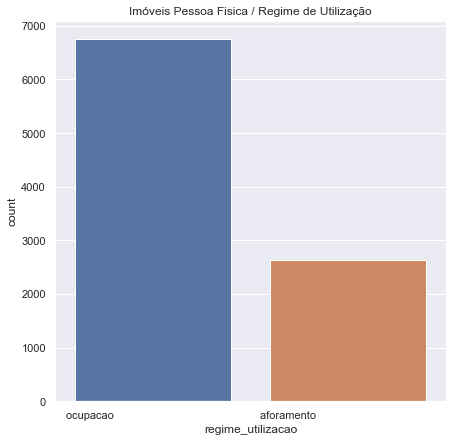

In [367]:
fig, axs = plt.subplots(figsize=(7,7))
sns.set()
count_responsaveis_sinfo = sns.countplot(x="regime_utilizacao", data=responsaveis_sinfo, palette='deep')
plt.title('Imóveis Pessoa Fisica / Regime de Utilização');

In [401]:
sinfo2 = responsaveis_sinfo.regime_utilizacao.value_counts()
sinfo = responsaveis_sinfo.regime_utilizacao.count()
print(sinfo2)
print('O total é de:', sinfo)

ocupacao                                              6756
aforamento                                            2638
Name: regime_utilizacao, dtype: int64
O total é de: 9394


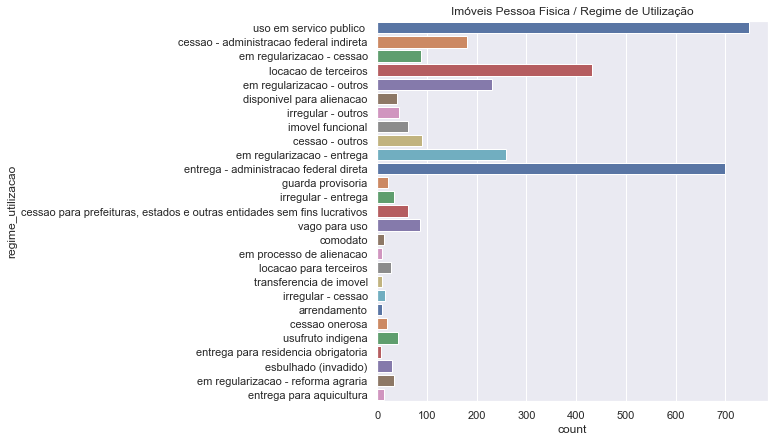

In [375]:
fig, axs = plt.subplots(figsize=(7,7))
sns.set()
count_responsaveis_apf = sns.countplot(y="regime_utilizacao", data=responsaveis_apf, palette='deep')
plt.title('Imóveis Pessoa Fisica / Regime de Utilização');

In [402]:
apf2 = responsaveis_apf.regime_utilizacao.value_counts()
apf = responsaveis_apf.regime_utilizacao.count()
print(apf2)
print("O total é de:", apf)

uso em servico publico                                                     748
entrega - administracao federal direta                                     700
locacao de terceiros                                                       432
em regularizacao - entrega                                                 259
em regularizacao - outros                                                  231
cessao - administracao federal indireta                                    180
cessao - outros                                                             89
em regularizacao - cessao                                                   88
vago para uso                                                               85
cessao para prefeituras, estados e outras entidades sem fins lucrativos     62
imovel funcional                                                            61
irregular - outros                                                          44
usufruto indigena                                   

Notamos que a maior parte dos imóveis está em uso de pessoas físicas, porém não conseguimos detectar através destes dados quais tipso de bens essas pessoas estão utilizando.

Há também uma enorme diferença entre o total de imóveis dominiais entre um dataset e outro. A União alega que separa os datasets para garantir o anonimato, porém o que houve no momento de anonimização? Como esse procedimento é realizado? Pois deveríamos ter o mesmo volume de dados em ambos os casos.

Uma possibilidade de inferência estatística entre as tabelas imóveis.csv e responsaveis.csv seria a realização de um teste de hipotese, para chegar a um percentual do quanto a tabela responsáveis está inserida na tabela imóveis e assim melhor comunicar os dados auferidos

O que me chama a atenção é que a União é responsável por um importante conjunto de bens o qual poderiam ser disponibilizados para o bem comum e não o são. Não há transparência de como se é administrado os bens e nem quem são os seus beneficiários.

Enquanto isso, questões como a do Ocupação do Largo do Paissando e da Ponte da Marginal Tietê ficam relegadas ao esquecimento. No caso do préido da ocupação, a União poderia ter agido em articulação com a prefeitura e organizações da sociedade civil para solucionar tanto a destinação das pessoas quanto realizado uma adequação do prédio para a moradia, já que o Brasil possui altos indíces de défict de moradia.

Sobre a ponte da Marginal, é necessário atuar em parceria com a prefeitura da cidade e realizar um levantamento de quantas pontes a União é responsável direta ou indiretamente na cidade e providenciar o seu reparo para evitar que ocorra o que ocorreu na Alça de Acesso da Castelo Branco na Marginal Pinheiros.


Matérias interessantes sobre o assunto na mídia:

https://apublica.org/2018/06/milhares-de-imoveis-da-uniao-estao-vagos-para-uso/
https://www.correiobraziliense.com.br/app/noticia/economia/2018/05/03/internas_economia,677944/governo-federal-e-dono-de-655-mil-imoveis-num-total-de-r-68-bilhoes.shtml